In [7]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
data=pd.read_csv('data/data.csv')

In [8]:
baseColumns = ['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME',
       'R_DEBT_SAVINGS', 'T_CLOTHING_12', 
       'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT',
       'T_EDUCATION_12', 'R_EDUCATION_INCOME',
       'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12',
       'R_ENTERTAINMENT_INCOME',
       'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12',
       'R_FINES_INCOME', 'R_FINES_SAVINGS',
       'R_FINES_DEBT', 'T_GAMBLING_12',
       'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT',
       'T_GROCERIES_12', 'R_GROCERIES_INCOME',
       'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12',
       'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT',
       'T_HOUSING_12', 'R_HOUSING_INCOME',
       'R_HOUSING_SAVINGS', 'R_HOUSING_DEBT', 'T_TAX_12',
       'R_TAX_INCOME', 'R_TAX_SAVINGS', 'R_TAX_DEBT', 'T_TRAVEL_12',
       'R_TRAVEL_INCOME', 'R_TRAVEL_SAVINGS',
       'R_TRAVEL_DEBT', 'T_UTILITIES_12', 'T_EXPENDITURE_12',
       'R_UTILITIES_INCOME', 'R_UTILITIES_SAVINGS', 'R_UTILITIES_DEBT',
       'R_EXPENDITURE_INCOME', 'R_EXPENDITURE_SAVINGS', 'R_EXPENDITURE_DEBT',
       'CAT_GAMBLING', 'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE',
       'CAT_SAVINGS_ACCOUNT', 'CAT_DEPENDENTS']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['CAT_GAMBLING'] = le.fit_transform(data['CAT_GAMBLING'])
data_crop=data.drop(["DEFAULT","CREDIT_SCORE","CUST_ID"],axis=1)

In [9]:
X= data_crop[baseColumns]
y = np.array(data['DEFAULT'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

random_seed = 122
model = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=random_seed).fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))
print(accuracy_score(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85       172
           1       0.74      0.21      0.32        68

    accuracy                           0.75       240
   macro avg       0.75      0.59      0.59       240
weighted avg       0.75      0.75      0.70       240

0.7541666666666667


In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [36]:
X_train_scaled.shape

(560, 60)

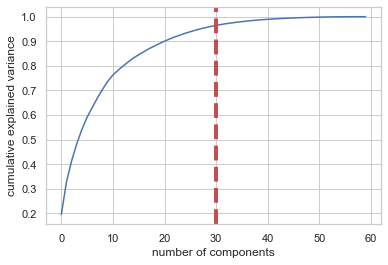

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.196305,0.196305
1,0.328622,0.132317
2,0.414555,0.085932
3,0.484012,0.069457
4,0.542552,0.058541
5,0.591472,0.048920
6,0.631306,0.039834
7,0.669935,0.038629
8,0.705128,0.035193
9,0.737347,0.032219


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=60)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=30, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [45]:
pca = PCA(n_components=30)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

In [46]:
rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train_scaled_pca, y_train)
display(rfc_2.score(X_train_scaled_pca, y_train))

1.0

In [47]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc_2, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_scaled_pca, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 500,
 'min_samples_split': 39,
 'min_samples_leaf': 18,
 'max_features': 'sqrt',
 'max_depth': 11,
 'bootstrap': False}

In [59]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,500,39,18,sqrt,11,False,0.726784,1
1,300,39,2,sqrt,3,True,0.725011,2
2,400,2,23,sqrt,11,False,0.725001,3
3,500,23,23,sqrt,8,False,0.725001,3
4,600,50,23,sqrt,14,False,0.725001,3
5,200,12,2,log2,4,True,0.723248,6
6,500,18,7,log2,7,True,0.723228,7
7,400,23,12,sqrt,11,True,0.721436,8
8,100,50,18,sqrt,6,False,0.719673,9
9,500,12,18,sqrt,13,False,0.719663,10


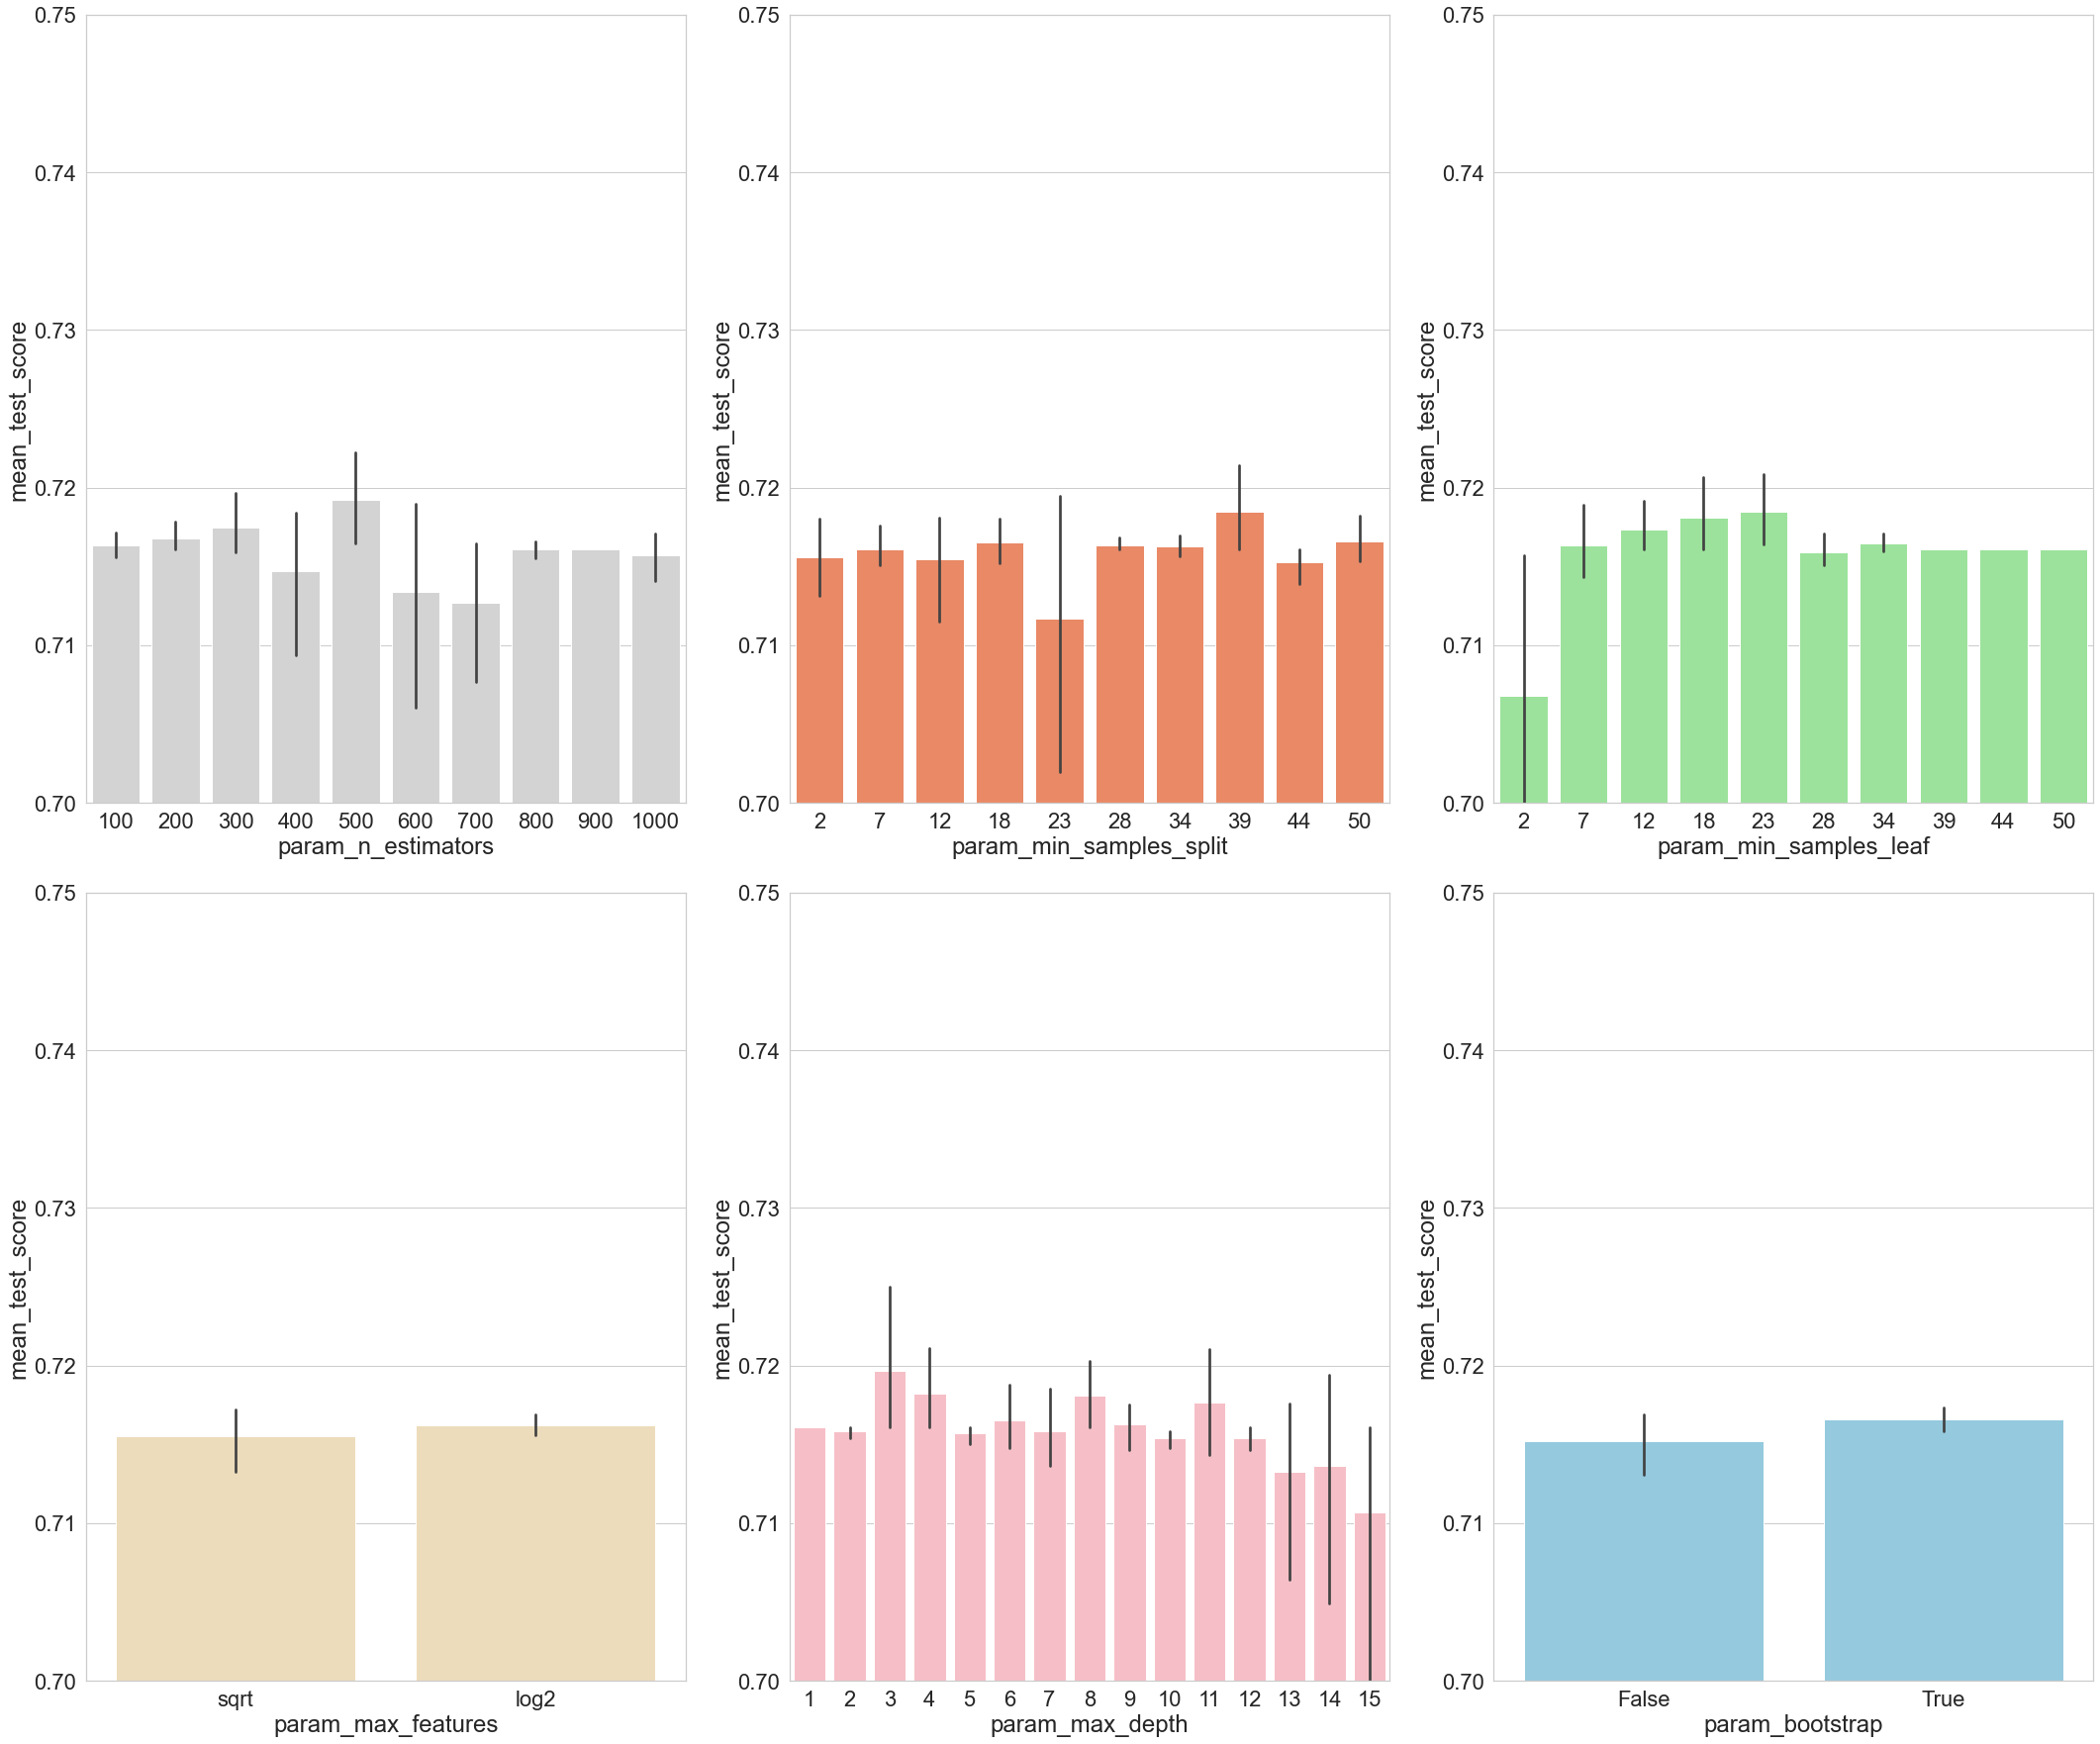

In [62]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(30, 25))
sns.set(style="whitegrid", color_codes=True, font_scale=2)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0, 0], color='lightgrey')
axs[0, 0].set_ylim([.70, .75])

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0, 1], color='coral')
axs[0, 1].set_ylim([.70, .75])

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0, 2], color='lightgreen')
axs[0, 2].set_ylim([.70, .75])

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1, 0], color='wheat')
axs[1, 0].set_ylim([.70, .75])

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1, 1], color='lightpink')
axs[1, 1].set_ylim([.70, .75])

sns.barplot(x='param_bootstrap', y='mean_test_score', data=rs_df, ax=axs[1, 2], color='skyblue')
axs[1, 2].set_ylim([.70, .75])

plt.tight_layout()
plt.show()

Fitting 3 folds for each of 100 candidates, totalling 300 fits


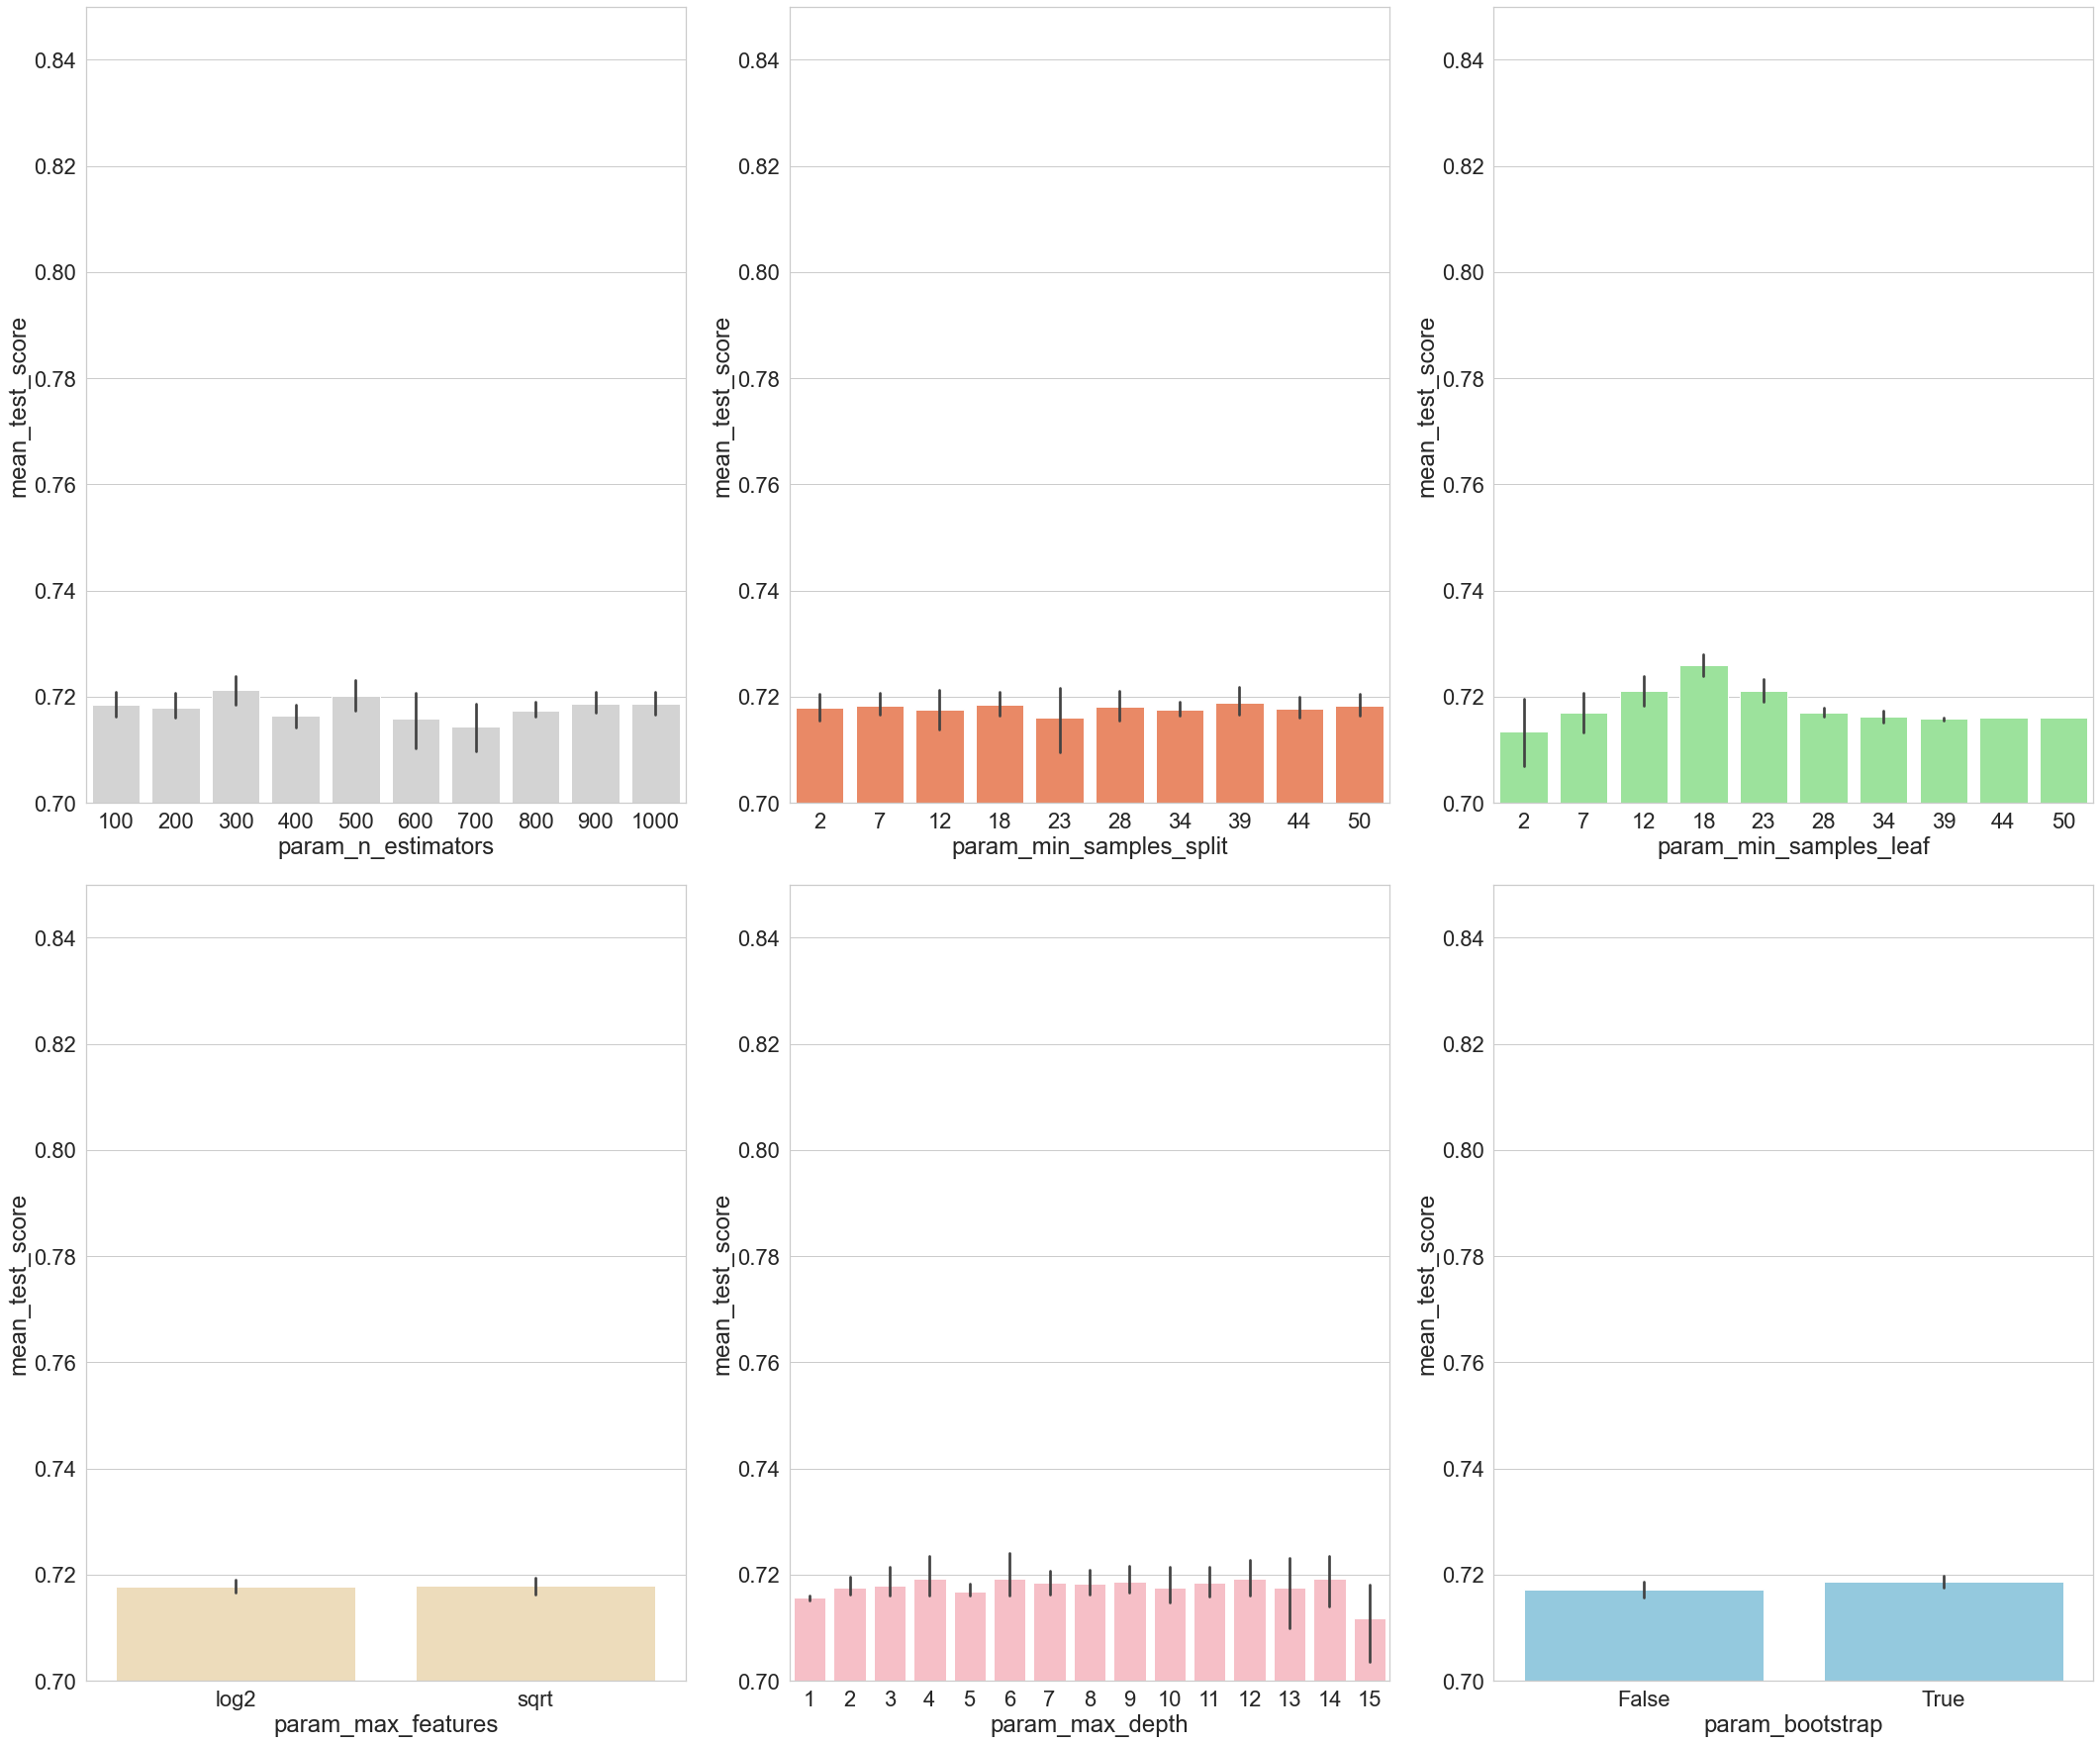

In [70]:
pca = PCA(n_components=15)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train_scaled_pca, y_train)

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc_2, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_scaled_pca, y_train)

rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(30, 25))
sns.set(style="whitegrid", color_codes=True, font_scale=2)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0, 0], color='lightgrey')
axs[0, 0].set_ylim([.70, .85])

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0, 1], color='coral')
axs[0, 1].set_ylim([.70, .85])

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0, 2], color='lightgreen')
axs[0, 2].set_ylim([.70, .85])

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1, 0], color='wheat')
axs[1, 0].set_ylim([.70, .85])

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1, 1], color='lightpink')
axs[1, 1].set_ylim([.70, .85])

sns.barplot(x='param_bootstrap', y='mean_test_score', data=rs_df, ax=axs[1, 2], color='skyblue')
axs[1, 2].set_ylim([.70, .85])

plt.tight_layout()
plt.show()

#10, 50 bad

In [71]:
best_model = RandomForestClassifier(n_estimators=500,
                                    min_samples_split=39,
                                    min_samples_leaf=18,
                                    max_features='sqrt',
                                    max_depth=11,
                                    bootstrap=False,
                                    random_state=0)

best_model.fit(X_train_scaled_pca, y_train)

y_pred = best_model.predict(X_test_scaled_pca)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       172
           1       0.64      0.13      0.22        68

    accuracy                           0.73       240
   macro avg       0.69      0.55      0.53       240
weighted avg       0.71      0.73      0.66       240

0.7333333333333333


In [75]:
pca = PCA(n_components=50)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

best_model.fit(X_train_scaled_pca, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test_scaled_pca)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       172
           1       0.89      0.12      0.21        68

    accuracy                           0.75       240
   macro avg       0.81      0.56      0.53       240
weighted avg       0.78      0.75      0.67       240

0.7458333333333333
